<a href="https://colab.research.google.com/github/tsvoronos/API202-students/blob/main/API_202_ReviewSession2_MD_Answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# API-202 Review Session #2
**Friday, February 3**

TF: Matthew Dodier

# Table of Contents
1. [Lecture Recap](#Lecture-Recap)
2. [Exercises](#Exercises)

# Lecture Recap

## Multiple Regression Analysis

* Multiple regression analysis brings us closer to making __causal claims__ because it allows us to explicitly "hold constant" many other factors which affect the dependent variable.
* Multiple regression analysis also allows us to make __better predictions__ for $Y$. It does this by leveraging explanatory power from several independent variables to explain variation in $Y$, not just one. 
* The key strength of multiple regression lies in the ability to say how much $Y$ varies when $X$ varies, __ceteris paribus__ (i.e. holding constant other variables that affect $Y$ ).

## Adding Explanatory Variables: Multivariate OLS

A population regression function (PRF) with one explanatory variables $X_1$:

$$
Y=\beta_0+\beta_1 X_1+\varepsilon
$$

We can write a PRF with two explanatory variables, $X_1$ and $X_2$:

$$
Y=\beta_0+\beta_1 X_1+\beta_2 X_2+\varepsilon
$$

Or 100 control variables...
$$
Y=\beta_0+\sum_{n=1}^{100} \beta_n X_n+\varepsilon
$$
____________________  

## Reinterpreting $\beta_1$: "ceteris paribus" logic

* With a bivariate regression:
  * The slope coefficient $\beta_1$ tells us the average change in $\mathrm{Y}$ associated with a one-unit change in $X_1$
* With a multivariate regression with two controls:
  * The slope coefficient $\beta_1$ tells us the average change in $Y$ associated with a one-unit change in $X_1$, holding $X_2$ constant
  * The intercept $\beta_0$ tells us the predicted value of $Y$ for individuals with $X_1=0$ and $X_2=0$
* With a multivariate regression with 100 controls:
  * The slope coefficient $\beta_1$ tells us the average change in $Y$ associated with a one-unit change in $X_1$, holding constant all 99 remaining control variables


## A caveat: perfect collinearity

* While you can include almost any variable you want on the right hand side of a regression equation, you cannot add a variable that is perfectly correlated with another variable in the equation - we call this __perfect collinearity__. Some common examples of violating this rule:

  * Including in the regression one variable that is a constant multiple of another (e.g., same variable measured in different units).

  * One independent variable can be expressed as an exact linear combination of two or more independent variables.
  
* If you include variables that are perfectly collinear, $\mathrm{R}$ will drop one of the variables from the equation before estimating it.

## R-squared $\left(R^2\right)$

* $R^2$ provides a measure of how well our regression equation fits the data.
* Specifically, it tell us how much the variation in $Y$ can be explained by our regression line.
  * "Explained variation" = the extent to which values for $Y$ land on our regression line
  * "Unexplained variation" = the extent to which values for $Y$ differ from what the regression line would predict

## Multiple Regression Key Takeaways

* Multiple regression helps us measure the magnitude of the relationship between two variables, while holding other variables constant.

* Holding other variables constant usually gets us closer to true causal estimates. Multiple regression is thus usually more convincing than bivariate regression.

* The key question is whether the researcher has controlled for all relevant variables that substantially affect the story being told.

## Omitted Variable Bias

* __Omitted variable, a factor we don't observe but might explain some of the association between the $X$ and $Y$ of interest.__
  * Such omitted variables can make OLS estimates __biased__, so that they do not accurately measure causal impacts.
  * We will learn how to assess both the __magnitude__ and __sign__ of the bias.

_______________

  * In general, why don't we correct this problem by adding the relevant variables to the model?
  * Three key reasons
  1. We are looking at someone else's analysis and considering what might be wrong with it
  2. We simply don't have the necessary data
  3. We don't know what to control for
  * Therefore, it is important to understand how omitted variable bias affects our estimates  

## Quantifying Omitted Variable Bias

* We will study OVB in the context of a multiple regression model with two explanatory variables.

1. Long PRF (true):
$$
Y=\beta_0+\beta_1 X_{1}+\beta_2 X_{2}+\varepsilon
$$
2. Short PRF (estimated):
$$
Y=\alpha_0+\alpha_1 X_{1}+v
$$
3. Auxiliary PRF
$$
X_{2}=\gamma_0+\gamma_1 X_{1}+u
$$


Bias:
$$
\alpha_1-\beta_1 \quad=\quad \beta_2 \cdot \gamma_1
$$

* $\alpha_1-\beta_1=$ Difference between Short and Long coefficient on $X_1$ 
* $\beta_2 \cdot \gamma_1=$  Product of Long coefficient on $X_2$ and Auxiliary coefficient on $X_1$



______________

## Conditions for OVB via the Formula

$$
\text { Bias }=\alpha_1-\beta_1=\beta_2 \gamma_1
$$

* The magnitude of the bias thus depends on the magnitudes of $\beta_2$ and $\gamma_1$. 

* This yields two necessary conditions for OVB. Our estimate for the short regression's $\alpha_1$ will be a biased estimate for the true causal impact $\beta_1$ only if:

  1. $X_2$ is correlated with outcome $Y\left(\beta_2 \neq 0\right)$
  and
  2. $X_2$ is correlated with the predictor of interest $X_1\left(\gamma_1 \neq 0\right)$

* Thus, if both conditions hold, the estimated slope coefficient for the short regression will be a biased estimator of $\beta_1$.

____________

* You may encounter discussions of bias in which the estimated effect is described as __understated__ or __overstated__, relative to the true causal effect.
  * Overstated (overestimated) -- "too steep"
    * Omitting variable makes the magnitude of the estimate __larger__ than the true effect in absolute terms (farther from zero)
  * Understated (underestimated) -- "too flat"
    * Omitting variable makes the magnitude of the estimate __smaller__ than the truth in absolute terms (closer to zero)


* __Question:__ Suppose you have a sample and run a regression where the estimated coefficient is $\beta_1^{\text {Estimate }}=1.2$, but because you omitted one variable, the true coefficient in reality is $\beta_1^{\text {True }}=0.8$. Is the estimated effect overstating or understating the true causal effect?

Your answer here:

* $0<\beta_1^{\text {True }}<\beta_1^{\text {Estimate }}$

* Overstating the true causal effect (too step)

* __Question:__ Suppose you have a sample and run a regression where the estimated coefficient is $\beta_1^{\text {Estimate }}=-15$, but because you omitted one variable, the true coefficient in reality is $\beta_1^{\text {True }}=-60$. Is the estimated effect overstating or understating the true causal effect?

Your answer here:

* $\beta_1^{\text {True }}<\beta_1^{\text {Estimate }}<0$

* Understate the true causal effect (too flat)


## OVB Key Takeaways

* OVB is the single most widespread problem in studies attempting to measure the impacts of public policies or other interventions.
* Our goal is to make you a critical consumer of such claims.
* Ask yourself: Does another story (omitted variable) explain some of the association that the researchers have found?
  * Practice developing an intuition for the sign (and maybe magnitude) of this bias.
  * Practice assessing how reported policy impacts relate to true impacts.

# Exercises

The purpose of this exercise is to help you understand multiple regression.

The dataset for this exercise comes from J.E. Biddle and D.S. Hamermesh (1990), “Sleep and the Allocation of Time,” Journal of Political Economy 98, 922-943.. A few of the variables in this dataset include:

*   `age`: age in years 
*   `lhrwage`: log hourly wage
*   `educ`: years of schooling
*   `marr`: 1 if married
*   `gdhlth1`: 1 oif in good or excel. health
*   `yngkid`: =1 if children younger than 3 years old are present
*   `sleep`: minutes sleep at night, per week

In [ ]:
#suppress warnings
options(warn =-1,dplyr.summarise.inform=FALSE)

library(tidyverse)

sleep <- read.csv('https://raw.githubusercontent.com/tsvoronos/API202-students/main/data/sleep75.csv')
head(sleep)


,X,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,⋯,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>
1,1,32,0,1,0,0,12,0,0,1,⋯,0,3438,0,3438,0,14,0,13,7.070004,1024
2,2,31,0,2,0,0,14,9500,1,1,⋯,0,5020,0,5020,0,11,0,0,1.429999,961
3,3,44,0,3,0,0,17,42500,1,1,⋯,1,2815,0,2815,0,21,0,0,20.529997,1936
4,4,30,0,4,0,0,12,42500,1,1,⋯,1,3786,0,3786,0,12,0,12,9.619998,900
5,5,64,0,5,0,0,14,2500,1,1,⋯,1,2580,0,2580,0,44,0,33,2.750000,4096
6,6,41,0,6,0,0,12,0,1,1,⋯,0,1205,0,0,1205,23,0,23,19.249998,1681


**1. Use a histogram to plot the variable age.**

HINT: the code for a histogram is `ggplot(dataset, aes(x = var)) +
geom_histogram()`
Where dataset is the name of the dataset and var is thevariable of interest.

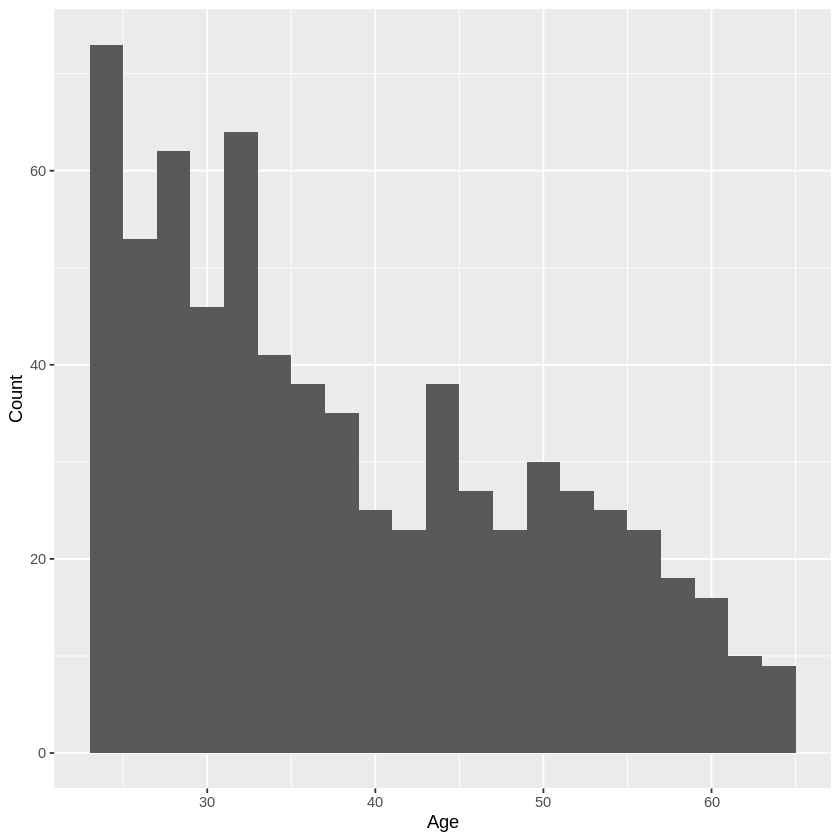

In [ ]:
# Your code here

ggplot(sleep, aes(x = age)) +
geom_histogram(binwidth = 2) +
labs(x = "Age", y = "Count")

**2. What is the median of the sleep variable and the mean age?**

HINT: you can use the summary command (e.g., `summary(data$var`)) to get summary
statistics for a variable called var in a dataset called data). Or, using the tidyverse, you can use the `select(var1,var2)` command and pipe that into `summary()`.

In [ ]:
# Your code here

sleep %>% select(sleep,age) %>% summary()

     sleep           age       
 Min.   : 755   Min.   :23.00  
 1st Qu.:3015   1st Qu.:29.00  
 Median :3270   Median :36.00  
 Mean   :3266   Mean   :38.82  
 3rd Qu.:3532   3rd Qu.:48.00  
 Max.   :4695   Max.   :65.00  

Your answer here:

The median value for sleep is 3,266 minutes of sleep per week. The mean for age is 38.82 years of age.


**3. Run a regression of sleep on age. Discuss the statistical significance of the estimate and also interpret the intercept of the regression that you run.**

In [ ]:
# Your code here

reg1 <- lm(sleep ~ age, data=sleep)
summary(reg1)


Call:
lm(formula = sleep ~ age, data = sleep)

Residuals:
     Min       1Q   Median       3Q      Max 
-2455.35  -254.39     9.55   270.77  1381.96 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3128.913     59.468  52.615   <2e-16 ***
age            3.541      1.471   2.408   0.0163 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 442.9 on 704 degrees of freedom
Multiple R-squared:  0.008167,	Adjusted R-squared:  0.006758 
F-statistic: 5.797 on 1 and 704 DF,  p-value: 0.01631


Your answer here:

The coefficient on age is statistcally significant at the 5 percent level because the p-value is less than 0.05.  Additionally, the intercept indicates that the average value of sleep per week is 3,128.913 minutes per week regardless of age.

**4. Next let's run a regression of the age and log hourly wage variables on  sleep. Discuss the statistical significance and magnitude of each coefficient in the regression.**

In [ ]:
# Your code here

reg2 <- lm(sleep ~ age + lhrwage, data=sleep)
summary(reg2)



Call:
lm(formula = sleep ~ age + lhrwage, data = sleep)

Residuals:
     Min       1Q   Median       3Q      Max 
-1736.51  -250.24     2.46   254.47  1392.20 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3244.295     76.999  42.134   <2e-16 ***
age            2.185      1.664   1.313    0.190    
lhrwage      -47.908     29.618  -1.618    0.106    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 430.1 on 529 degrees of freedom
  (174 observations deleted due to missingness)
Multiple R-squared:  0.00775,	Adjusted R-squared:  0.003999 
F-statistic: 2.066 on 2 and 529 DF,  p-value: 0.1277


Your answer here:

Both the age and log hourly wage variables are not statistically significant because the p-values are both greater than 0.1.  The coefficient on the age variable decreases when we add log hourly wage to the regression.  Further, the coefficient for log hourly wage is negative.

**5. Now, let's include the years of education among the independent variables in the regression described in Question 4. Similarly, discuss the statistical significance and magnitude of each coefficient in the regression.**

In [ ]:
# Your code here

reg3 <- lm(sleep ~ age + lhrwage + educ, data=sleep)
summary(reg3)


Call:
lm(formula = sleep ~ age + lhrwage + educ, data = sleep)

Residuals:
     Min       1Q   Median       3Q      Max 
-1746.75  -259.60    -2.19   249.49  1394.98 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3321.344    126.629  26.229   <2e-16 ***
age            1.820      1.731   1.051    0.294    
lhrwage      -40.835     31.033  -1.316    0.189    
educ          -5.748      7.498  -0.767    0.444    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 430.3 on 528 degrees of freedom
  (174 observations deleted due to missingness)
Multiple R-squared:  0.008853,	Adjusted R-squared:  0.003222 
F-statistic: 1.572 on 3 and 528 DF,  p-value: 0.1951


Your answer here:

All 3 coefficients (age, log hourly wage, and years of education) are not statistically significant because the p-values are both greater than 0.1.  The coefficient on the age variable decreases when we add years of education to the regression from question 4.  The coefficients for log hourly wage and years of education are both negative, although the coefficient for log hourly wage is less negative relative to the regression ran in question 4. 

**6. The outputs from the regressions are usually presented as well-formatted tables. In this question, you will learn how to nicely format a table with the results from multiple regressions.**

**First, run the script below installing the package modelsummary (this may take a minute or so to install).**

In [ ]:
check_installed <- require(modelsummary)
if(check_installed==F){
  install.packages("modelsummary")
  require(modelsummary)
}

Loading required package: modelsummary

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘webshot’, ‘bayestestR’, ‘datawizard’, ‘checkmate’, ‘insight’, ‘kableExtra’, ‘parameters’, ‘performance’, ‘tables’


Loading required package: modelsummary



**Next, include the results of the regressions you run in this exercise in a nicely formatted table using the existing code below to get started**

In the code snippet below, `fit1`, `fit2`, and `fit3` is the regression outputs you saved in Questions 3, 4, and 5, `Name of Outcome Variable` is what you would like to show up on the top of each column, and `var1` and `var2` are the name of two independent variables included in the regression (e.g., educ). Note that you can and should include all the variables that you used in the models you ran in the `coef_map` line.
```
  modelsummary(list("Name Outcome Variable" = fit1,"Name Outcome Variable" = fit2, "Name Outcome Variable" = fit3),
  stars=T,
  coef_map = c("(Intercept)" = "Constant","var1" = "Name of var1", "var2" = "Name of var2", "var3" = "Name of var3"),
 title = "Add Here the Title of the Table",
  gof_omit = 'IC|Log',
  output="jupyter")

  ```

In [ ]:
# Your code here

  modelsummary(list("Sleep" = reg1,"Sleep" = reg2, "Sleep" = reg3),
  stars=T,
  coef_map = c("(Intercept)" = "Constant","age" = "Age", "lhrwage" = "Log Hourly Wage", "educ" = "Years of Education"),
 title = "Relationship between Sleep and Individual Characteristics",
  gof_omit = 'IC|Log',
  output="jupyter")

,Sleep,Sleep,Sleep
Constant,3128.913***,3244.295***,3321.344***
,(59.468),(76.999),(126.629)
Age,3.541*,2.185,1.820
,(1.471),(1.664),(1.731)
Log Hourly Wage,,−47.908,−40.835
,,(29.618),(31.033)
Years of Education,,,−5.748
,,,(7.498)
Num.Obs.,706,532,532
R2,0.008,0.008,0.009
